# Should We Abolish the Personal Allowance?

The Personal Allowance is an element of the tax system in the United Kingdom which exempts around £12,500 of a person's income from tax rates. But here's the distributional impact of abolishing it - equivalent to an across-the-board progressive tax.


In [1]:
from openfisca_uk import Microsimulation
from openfisca_core.model_api import *
import plotly.express as px

class remove_PA(Reform):
    def apply(self):
        self.neutralize_variable("personal_allowance")

sim = Microsimulation()
no_PA_sim = Microsimulation(remove_PA)

In [6]:
net_baseline = sim.calc("equiv_household_net_income", map_to="person")
net_reform = no_PA_sim.calc("equiv_household_net_income", map_to="person")
change_from_abolishment = net_reform - net_baseline
income_decile = net_baseline.decile_rank()

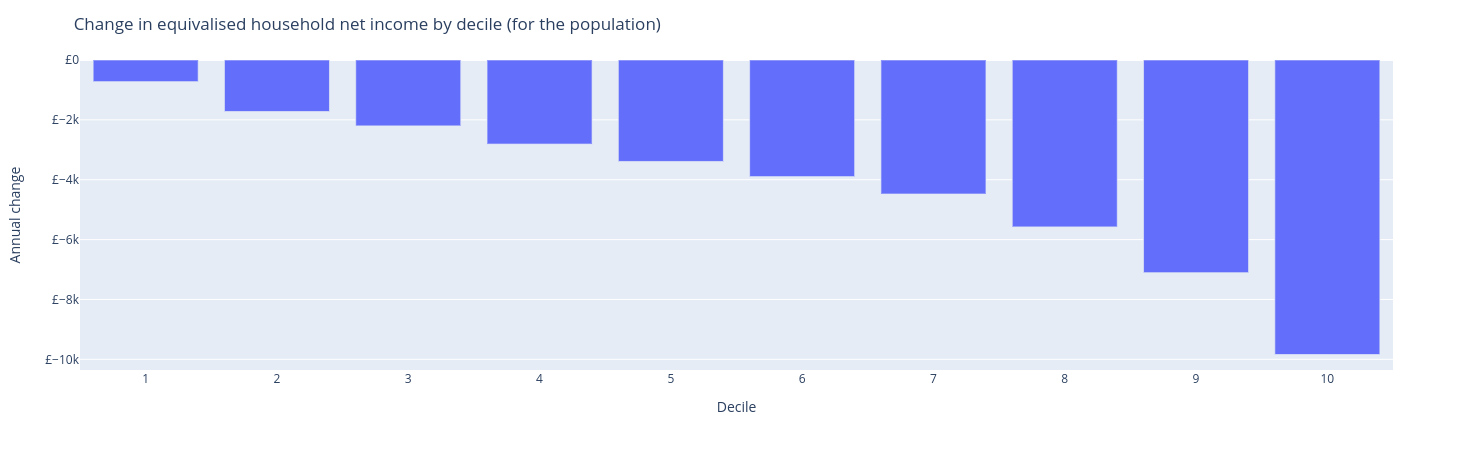

In [7]:
fig = px.bar(change_from_abolishment.dropna().groupby(income_decile).mean())
fig.update_layout(title="Change in equivalised household net income by decile (for the population)", xaxis_title="Decile", yaxis_tickprefix="£", yaxis_title="Annual change", xaxis_tickvals=list(range(1, 11)), showlegend=False)
fig